In [1]:
import pandas as pd 
import librosa
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import math, random
import torch
import numpy as np
import soundfile as sf
from sklearn.preprocessing import LabelEncoder

In [2]:
train_post_competition = pd.read_csv('train_post_competition.csv')
test_post_competition = pd.read_csv('test_post_competition.csv')
train_post_competition


,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution
...,...,...,...,...,...
9468,ffec59fb.wav,Fireworks,0,343090,Creative Commons 0
9469,fff37590.wav,Hi-hat,0,33136,Attribution
9470,fff44ac6.wav,Laughter,0,133674,Attribution
9471,fff6a13d.wav,Chime,0,14640,Attribution


In [3]:
train_post_competition.label.value_counts()

Hi-hat                   300
Laughter                 300
Shatter                  300
Applause                 300
Squeak                   300
Acoustic_guitar          300
Bass_drum                300
Saxophone                300
Flute                    300
Double_bass              300
Tearing                  300
Fart                     300
Clarinet                 300
Fireworks                300
Trumpet                  300
Violin_or_fiddle         300
Cello                    300
Snare_drum               300
Oboe                     299
Gong                     292
Knock                    279
Writing                  270
Cough                    243
Bark                     239
Tambourine               221
Burping_or_eructation    210
Cowbell                  191
Harmonica                165
Drawer_open_or_close     158
Meow                     155
Electric_piano           150
Gunshot_or_gunfire       147
Microwave_oven           146
Keys_jangling            139
Telephone     

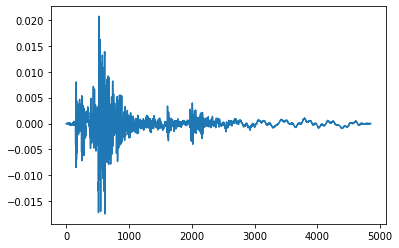

In [4]:
y, sr = librosa.load('audio_train/002d256b.wav', sr=11025)
plt.plot(y)

In [5]:
def time_shift(aud,sr, shift_limit):
    sig,sr = torch.tensor(aud), sr
    sig_len = sig.shape[0]
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (np.array(sig.roll(shift_amt)), sr)

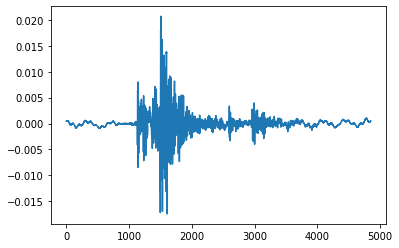

In [6]:
sig = time_shift(y,sr, shift_limit=0.3)
plt.plot(sig[0])

In [7]:
# augmented_train_post_competition = pd.DataFrame(columns=['fname','label'])


In [8]:
augmented_train_post_competition = {}
for label in train_post_competition.label.unique():
    num_samples = train_post_competition.label.value_counts()[label]
    if num_samples < 300:
        repeat_times = int((300-num_samples)/num_samples)+1
        FLAG = False
        for time in range(repeat_times):
            # print('time : ',time)
            for i in range(num_samples):
                # print(i, end=' ')
                file = train_post_competition[train_post_competition['label'] == label].iloc[i]['fname']
                aud, sr = librosa.load('audio_train_augmented/{}'.format(file), sr=11025)
                sig = time_shift(aud, sr, shift_limit=0.5)
                sf.write('audio_train_augmented/augmented_{}_{}'.format(time, file), sig[0], sig[1])
                augmented_train_post_competition['augmented_{}_{}'.format(time, file)] = label
                if (time+1)*num_samples+i+1 == 300:
                    FLAG=True
                    break
            if FLAG:
                break
        print('label : ', label, 'num of samples to be augmentd :', 300-num_samples, 'augmented samples :', time*num_samples+i+1)
    else:
        print('label : ', label, 'num of samples to be augmentd :', 300-num_samples)


print("Total augmented samples: ",len(augmented_train_post_competition))

label :  Hi-hat num of samples to be augmentd : 0
label :  Saxophone num of samples to be augmentd : 0
label :  Trumpet num of samples to be augmentd : 0
label :  Glockenspiel num of samples to be augmentd : 206 augmented samples : 206
label :  Cello num of samples to be augmentd : 0
label :  Knock num of samples to be augmentd : 21 augmented samples : 21
label :  Gunshot_or_gunfire num of samples to be augmentd : 153 augmented samples : 153
label :  Clarinet num of samples to be augmentd : 0
label :  Computer_keyboard num of samples to be augmentd : 181 augmented samples : 181
label :  Keys_jangling num of samples to be augmentd : 161 augmented samples : 161
label :  Snare_drum num of samples to be augmentd : 0
label :  Writing num of samples to be augmentd : 30 augmented samples : 30
label :  Laughter num of samples to be augmentd : 0
label :  Tearing num of samples to be augmentd : 0
label :  Fart num of samples to be augmentd : 0
label :  Oboe num of samples to be augmentd : 1 augm

In [9]:
print("Num of samples should be added: ",len(train_post_competition.label.unique()) * 300 - len(train_post_competition))

Num of samples should be added:  2827


In [10]:
print("Num of total training samples after augmented: ",len(os.listdir('audio_train_augmented/')))

Num of total training samples after augmented:  12300


In [11]:
# for label in train_post_competition.label.unique():
#     count=0
#     for i in list(augmented_train_post_competition.values()):
#         if i == label:
#             count+=1
#     print('label:',label, 'count:',count)

augmented_pd = pd.DataFrame.from_dict({'fname':augmented_train_post_competition.keys(), 'label':augmented_train_post_competition.values()})
augmented_pd

,fname,label
0,augmented_0_0033e230.wav,Glockenspiel
1,augmented_0_00f88dc5.wav,Glockenspiel
2,augmented_0_03bb1c33.wav,Glockenspiel
3,augmented_0_0bca94ec.wav,Glockenspiel
4,augmented_0_0ccf0903.wav,Glockenspiel
...,...,...
2822,augmented_1_8a8a9e60.wav,Finger_snapping
2823,augmented_1_8ad0ed99.wav,Finger_snapping
2824,augmented_1_8b49f457.wav,Finger_snapping
2825,augmented_1_8bff2f37.wav,Finger_snapping


In [12]:
augmented_train_post_competition = pd.concat([train_post_competition, augmented_pd])
augmented_train_post_competition

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0.0,28739.0,Attribution
1,001ca53d.wav,Saxophone,1.0,358827.0,Attribution
2,002d256b.wav,Trumpet,0.0,10897.0,Creative Commons 0
3,0033e230.wav,Glockenspiel,1.0,325017.0,Attribution
4,00353774.wav,Cello,1.0,195688.0,Attribution
...,...,...,...,...,...
2822,augmented_1_8a8a9e60.wav,Finger_snapping,NaN,NaN,NaN
2823,augmented_1_8ad0ed99.wav,Finger_snapping,NaN,NaN,NaN
2824,augmented_1_8b49f457.wav,Finger_snapping,NaN,NaN,NaN
2825,augmented_1_8bff2f37.wav,Finger_snapping,NaN,NaN,NaN


In [13]:
augmented_train_post_competition.label.value_counts()

Hi-hat                   300
Bass_drum                300
Squeak                   300
Scissors                 300
Harmonica                300
Gong                     300
Microwave_oven           300
Burping_or_eructation    300
Double_bass              300
Shatter                  300
Fireworks                300
Tambourine               300
Cowbell                  300
Electric_piano           300
Meow                     300
Drawer_open_or_close     300
Applause                 300
Acoustic_guitar          300
Violin_or_fiddle         300
Bus                      300
Chime                    300
Saxophone                300
Bark                     300
Trumpet                  300
Glockenspiel             300
Cello                    300
Knock                    300
Gunshot_or_gunfire       300
Clarinet                 300
Computer_keyboard        300
Keys_jangling            300
Snare_drum               300
Writing                  300
Laughter                 300
Tearing       

In [14]:
len(augmented_train_post_competition.label.unique()) * 300

12300

In [31]:
augmented_train_post_competition.to_csv('augmented_train_post_competition.csv',index=False)

In [30]:
augmented_train_post_competition = augmented_train_post_competition.sample(frac=1).reset_index(drop=True)

In [36]:
labelEncoder = LabelEncoder()
labelEncoder.fit_transform(train_post_competition.label.value_counts().keys())

array([23, 26, 32,  1, 34,  0,  3, 30, 18, 12, 36, 15,  8, 17, 38, 39,  6,
       33, 29, 20, 25, 40, 10,  2, 35,  4, 11, 22, 13, 27, 14, 21, 28, 24,
       37,  9, 16,  7,  5, 31, 19])

## Load wav files and extract features through mfcc, save as npy files

In [24]:
train_path = 'audio_train_augmented/'
test_path = 'audio_test/'

In [25]:
count = 0
trainX, trainY, devX, devY = [], [], [], []

for index in range(len(augmented_train_post_competition)-1000):
    file = augmented_train_post_competition['fname'].iloc[index]
    x, sr = librosa.load(os.path.join(train_path,file), sr=11025)
    mfccX = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=24)
    y =  labelEncoder.transform([augmented_train_post_competition['label'].iloc[index],])
    trainX.append(torch.tensor(mfccX.T))
    trainY.append(torch.tensor(y))
    count +=1 
    print(count, end=',')
    # if count >40:
    #     break
        
count = 0    
for index in range(len(augmented_train_post_competition)-1000, len(augmented_train_post_competition)):
    file = augmented_train_post_competition['fname'].iloc[index]
    x, sr = librosa.load(os.path.join(train_path,file), sr=11025)
    mfccX = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=24)
    y =  labelEncoder.transform([augmented_train_post_competition['label'].iloc[index],])
    devX.append(torch.tensor(mfccX.T))
    devY.append(torch.tensor(y))
    count +=1 
    print(count, end=',')
    # if count >40:
    #     break

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [31]:
augmented_train_post_competition.iloc[-1000:-1]

,fname,label,manually_verified,freesound_id,license
11300,augmented_1_568f4336.wav,Chime,NaN,NaN,NaN
11301,752c7638.wav,Laughter,0.0,19156.0,Attribution
11302,cd4aad88.wav,Squeak,1.0,18066.0,Attribution
11303,3e52cc7a.wav,Writing,0.0,264945.0,Creative Commons 0
11304,a8aac00d.wav,Microwave_oven,0.0,238408.0,Attribution
...,...,...,...,...,...
12294,augmented_0_06fbb272.wav,Drawer_open_or_close,NaN,NaN,NaN
12295,41a0e93b.wav,Telephone,1.0,273345.0,Creative Commons 0
12296,39b0f258.wav,Cowbell,0.0,90553.0,Creative Commons 0
12297,fec180d4.wav,Trumpet,1.0,357868.0,Attribution


In [26]:
base_path = 'augmented_mfcc24_npy_files/'
with open(base_path+'trainX.npy', 'wb') as f:
    np.save(f, np.array(trainX))
with open(base_path+'trainY.npy', 'wb') as f:
    np.save(f, np.array(trainY))
with open(base_path+'devX.npy', 'wb') as f:
    np.save(f, np.array(devX))
with open(base_path+'devY.npy', 'wb') as f:
    np.save(f, np.array(devY))



/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_68078/2690176635.py:3: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.save(f, np.array(trainX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_68078/2690176635.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(trainX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipyke

In [27]:
test_post_competition = pd.read_csv('test_post_competition.csv')
testX, testY = [], []
count =0
for index in range(len(test_post_competition)): 
    label = test_post_competition['label'].iloc[index]
    if label == 'None':
        pass
    else:
        file = test_post_competition['fname'].iloc[index]
        x, sr = librosa.load(os.path.join(test_path,file), sr=11025)
        mfccX = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=24)
        y =  labelEncoder.transform([label,])
        testX.append(torch.tensor(mfccX.T))
        testY.append(torch.tensor(y))
        count +=1 
        print(count, end=',')
    # if count >40:
    #     break

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [28]:
with open(base_path+'testX.npy', 'wb') as f:
    np.save(f, np.array(testX))
with open(base_path+'testY.npy', 'wb') as f:
    np.save(f, np.array(testY))

/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_68078/152888235.py:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.save(f, np.array(testX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_68078/152888235.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(testX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel

## Load wav files and extract features through Short-time Fourier transform (STFT), save as npy files

In [16]:
def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    log_spect = np.log(spect)
    return log_spect

## investigate the different between MFCC and STFT

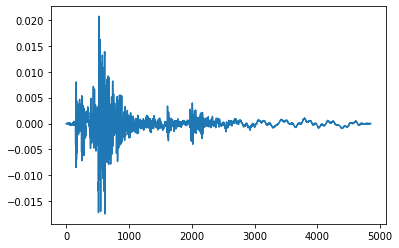

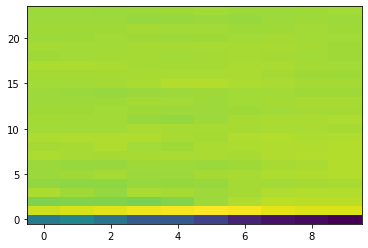

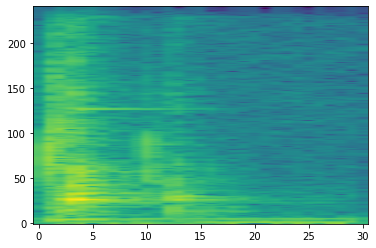

In [63]:
y, sr = librosa.load('audio_train/002d256b.wav', sr=11025)
mfccX = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=24)
spectrogram = get_spectrogram(y)

fig, ax = plt.subplots()
plt.plot(y)
fig, ax = plt.subplots()
plt.imshow(mfccX, aspect='auto', origin='lower',)
fig, ax = plt.subplots()
plt.imshow(spectrogram, aspect='auto', origin='lower',)


In [61]:
mfccX.shape, spectrogram.shape

((24, 302), (241, 965))

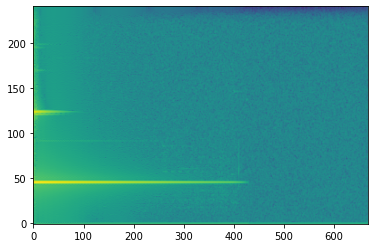

In [53]:
resized = cv2.resize(spectrogram, (668, 241))
plt.imshow(resized, aspect='auto', origin='lower',)

In [37]:
train_path = 'audio_train_augmented/'
test_path = 'audio_test/'
augmented_train_post_competition = pd.read_csv('augmented_train_post_competition.csv')

count = 0
trainX, trainY, devX, devY = [], [], [], []

for index in range(len(augmented_train_post_competition)-1000):
    file = augmented_train_post_competition['fname'].iloc[index]
    x, sr = librosa.load(os.path.join(train_path,file), sr=11025)
    spectrogram = get_spectrogram(x)
    y =  labelEncoder.transform([augmented_train_post_competition['label'].iloc[index],])
    trainX.append(torch.tensor(spectrogram.T))
    trainY.append(torch.tensor(y))
    count +=1 
    print(count, end=',')
    # if count >40:
    #     break
        
count = 0    
for index in range(len(augmented_train_post_competition)-1000, len(augmented_train_post_competition)):
    file = augmented_train_post_competition['fname'].iloc[index]
    x, sr = librosa.load(os.path.join(train_path,file), sr=11025)
    spectrogram = get_spectrogram(x)
    y =  labelEncoder.transform([augmented_train_post_competition['label'].iloc[index],])
    devX.append(torch.tensor(spectrogram.T))
    devY.append(torch.tensor(y))
    count +=1 
    print(count, end=',')
    # if count >40:
    #     break

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [39]:
base_path = 'augmented_stft_npy_files/'
with open(base_path+'trainX.npy', 'wb') as f:
    np.save(f, np.array(trainX))
with open(base_path+'trainY.npy', 'wb') as f:
    np.save(f, np.array(trainY))
with open(base_path+'devX.npy', 'wb') as f:
    np.save(f, np.array(devX))
with open(base_path+'devY.npy', 'wb') as f:
    np.save(f, np.array(devY))


/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_74625/1528562850.py:3: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.save(f, np.array(trainX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_74625/1528562850.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(trainX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipyke

In [43]:
test_post_competition = pd.read_csv('test_post_competition.csv')
testX, testY = [], []
count =0
for index in range(len(test_post_competition)): 
    label = test_post_competition['label'].iloc[index]
    if label == 'None':
        pass
    else:
        file = test_post_competition['fname'].iloc[index]
        x, sr = librosa.load(os.path.join(test_path,file), sr=11025)
        spectrogram = get_spectrogram(x)
        y =  labelEncoder.transform([label,])
        testX.append(torch.tensor(spectrogram.T))
        testY.append(torch.tensor(y))
        count +=1 
        print(count, end=',')
    # if count >40:
    #     break

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [44]:
with open(base_path+'testX.npy', 'wb') as f:
    np.save(f, np.array(testX))
with open(base_path+'testY.npy', 'wb') as f:
    np.save(f, np.array(testY))

/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_74625/152888235.py:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.save(f, np.array(testX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel_74625/152888235.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(testX))
/var/folders/9f/q0jwlcld39z0gypb396pnynm0000gn/T/ipykernel

In [55]:
m = torch.nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [57]:
output

tensor([[0.7854, 0.0772, 0.1374],
        [0.1030, 0.3621, 0.5350]])

In [59]:
input

tensor([[ 1.2511, -1.0685, -0.4924],
        [-0.9669,  0.2903,  0.6807]])